# Task-1. Build a Simple CNN on the MNIST Dataset:
   - Create a simple CNN architecture on the MNIST dataset and document what difference have you seen in results compared to your previous assignment where you had to develop a simple ANN model on the MNIST dataset.
   - Document the architecture of your CNN, including the number of layers, types of layers, and parameters used.
   - Train your CNN on the MNIST dataset and explore the use of callbacks (e.g., EarlyStopping, ModelCheckpoint) while training models.
   - Document the training process, including data preprocessing steps, training parameters (learning rate, batch size, epochs), and any challenges faced.
   - Evaluate the performance 


In [1]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


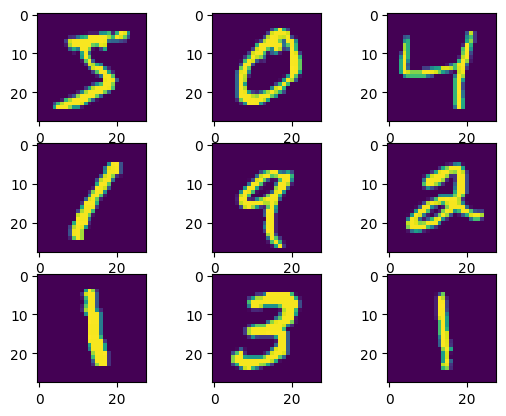

In [4]:
# plotting the first 9 images in the train set of MNIST

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [5]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [6]:
model = tf.keras.models.Sequential()

- Now we have a model, which doesn't have any layers in it. Those have to be added manually.

In [7]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # input layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- We start out by adding a so-called *Flatten* layer as our first layer.
- In order to add a layer to our model, we use the *add* function. Then we can choose the kind of layer that we want from the *layers* module.
- We specified an input shape of 28x28 which represents the resolution of images.
- What a flattened layer basically does is it flattens the input and makes it one dimensional. So instead of a 28x28 grid, we end up with 784 neurons lined up.

In [8]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 2nd hidden layer

- We added two dense layers. These are our hidden layers and increase the complexity of our model.
- Both layers have 128 neurons each.
- The activation function is ReLU function.
- Dense layers connect every neuron of this layer with all the neurons of the next and previous layer.

In [9]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))   # output layer

- Last but not least we add an output layer. This one is also a dense layer but it only has 10 neurons and a different activation function.
- The values of the 10 neurons indicate how much our model believes that the respective number is the right classification.
- The first neuron is for the zero, the second for the one and so on.
- The activation function that we use here is the *softmax* function. This function scales the output values so that they all add upto one. Thus it transforms the absolute values into relative values.-

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8288 - loss: 0.6391
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9514 - loss: 0.1606
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9696 - loss: 0.1022
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9770 - loss: 0.0761
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9822 - loss: 0.0577
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9872 - loss: 0.0425
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9897 - loss: 0.0351
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9922 - loss: 0.0266
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9926 - loss: 0.0230
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9955 - loss: 0.0159


- *epochs* - This number defines how many times our model is going to see the same data over and over again.
- *batch_size* - This refers to the number of training examples utilized in one iteration.

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9712 - loss: 0.0998
0.08844985067844391
0.9753999710083008


In [14]:
prediction = model.predict([X_test])
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.3142979e-11, 2.5216790e-10, 5.8806515e-10, ..., 9.9999946e-01,
        2.3058180e-11, 1.4189668e-08],
       [1.3856963e-14, 1.2239306e-07, 9.9999982e-01, ..., 2.4154071e-12,
        2.1214198e-13, 3.2955568e-19],
       [9.1038871e-10, 9.9998158e-01, 3.3176839e-06, ..., 1.0921968e-05,
        2.1468679e-06, 4.9989531e-08],
       ...,
       [1.1788522e-13, 1.0548905e-08, 1.1030760e-13, ..., 4.7000622e-08,
        6.3644223e-09, 8.2690889e-07],
       [5.6393844e-12, 7.9663259e-10, 9.0174314e-13, ..., 1.9794798e-10,
        9.6384159e-05, 8.4554184e-13],
       [1.4635161e-11, 1.8559142e-11, 1.7265286e-09, ..., 1.7286684e-15,
        4.5052764e-10, 4.8247945e-15]], dtype=float32)

- This prediction consists of the ten activations or probabilities from the output neurons.
- Since we need to generate a result out of that, we are going to use the *argmax* function. This function returns the index of the highest value.
- In this case this is equivalent to the digit with the highest probability or activation.

In [15]:
# let us do prediction for single image

print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.99991477e-01 1.21357063e-10 2.36020242e-06 8.88033258e-11
 1.06921305e-10 1.33425209e-08 3.26437913e-07 1.39692462e-08
 3.76893128e-10 5.67300867e-06]


Prediction:  0


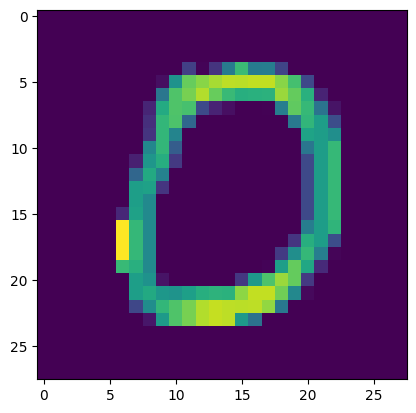

In [16]:
# visualize the image

plt.imshow(X_test[10])
plt.show()

- We can see that our model is pretty accurate. But it can still make mistakes, especially if we tend to write digits in a very unusual way.